<a href="https://colab.research.google.com/github/ghazalna/Deep-Learning/blob/main/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# Defining the data in a dictionary format
data = {
    "Model": ["ViT", "ResNet", "VGG16"],
    "Accuracy (%)": ["90-95", "93-96", "89-93"],
    "Loss (approx.)": ["0.1-0.2", "0.05-0.1", "0.1-0.2"],
    "Learning Rate": ["0.001 to 0.0003", "0.1 with decay", "0.001 with decay"],
    "Batch Size": ["64 or 128", "128 or 256", "64 or 128"],
    "Optimizer": ["Adam/AdamW", "SGD with momentum 0.9", "Adam/SGD with momentum 0.9"],
    "Epochs": ["100-300", "200-300", "200-300"],
    "Weight Decay": ["-", "0.0001 to 0.0005", "0.0005"],
    "Data Augmentation": ["Yes", "Yes", "Yes"],
    "Normalization": ["Layer Normalization", "Batch Normalization", "Batch Normalization"],
    "Regularization": ["Dropout 0.1-0.3", "None", "Dropout 0.5"]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df

,Model,Accuracy (%),Loss (approx.),Learning Rate,Batch Size,Optimizer,Epochs,Weight Decay,Data Augmentation,Normalization,Regularization
0,ViT,90-95,0.1-0.2,0.001 to 0.0003,64 or 128,Adam/AdamW,100-300,-,Yes,Layer Normalization,Dropout 0.1-0.3
1,ResNet,93-96,0.05-0.1,0.1 with decay,128 or 256,SGD with momentum 0.9,200-300,0.0001 to 0.0005,Yes,Batch Normalization,None
2,VGG16,89-93,0.1-0.2,0.001 with decay,64 or 128,Adam/SGD with momentum 0.9,200-300,0.0005,Yes,Batch Normalization,Dropout 0.5


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt
import numpy as np

# **Load Data**

In [3]:
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


# **Normalization**

In [6]:
x_train , x_test = x_train/255.0 , x_test /255.0       # for pictures use 255.0

# **OneHot Code**

In [7]:
#Categorical

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# **Data augmentation**

In [8]:
datagen = ImageDataGenerator(rotation_range = 15,
                           width_shift_range = 0.1,
                           height_shift_range = 0.1,
                           horizontal_flip = True)
datagen.fit(x_train)

In [9]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]


# **VGG16**



VGG16 is object detection and classification algorithm which is able to classify 1000 images of 1000 different categories with 92.7% accuracy. It is one of the popular algorithms for image classification and is easy to use with transfer learning.

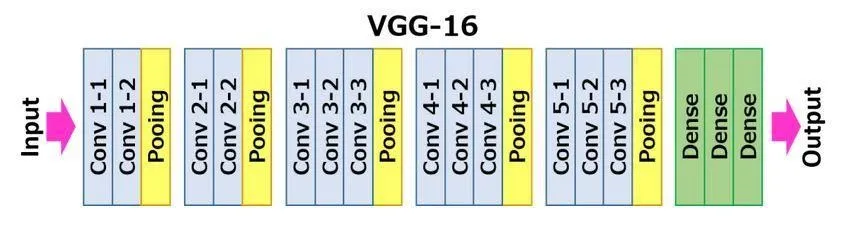

In [10]:
def creat_model_vgg16(input_shape=(32,32,3), num_class=10):
    model=models.Sequential()
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D((2, 2)))

    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPool2D((2, 2)))

    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_class, activation='softmax'))
    return model

# **Build Model**

In [11]:
vgg16_model = creat_model_vgg16()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
vgg16_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │              

 Total params: 3,253,834 (12.41 MB)

 Trainable params: 3,251,018 (12.40 MB)

 Non-trainable params: 2,816 (11.00 KB)

In [13]:
vgg16_model.compile(optimizer = optimizers.Adam(learning_rate=1e-3),
                    loss= 'categorical_crossentropy', metrics = ['accuracy'])

In [14]:
vgg16_history = vgg16_model.fit(datagen.flow(x_train, y_train, batch_size =64), epochs =10,
                                validation_data =(x_test, y_test))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 62ms/step - accuracy: 0.3954 - loss: 1.9418 - val_accuracy: 0.5533 - val_loss: 1.3254
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 49ms/step - accuracy: 0.6551 - loss: 0.9905 - val_accuracy: 0.6451 - val_loss: 1.0680
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.7186 - loss: 0.8067 - val_accuracy: 0.7243 - val_loss: 0.8201
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.7653 - loss: 0.6847 - val_accuracy: 0.7150 - val_loss: 0.8748
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.7907 - loss: 0.6076 - val_accuracy: 0.8160 - val_loss: 0.5454
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.8074 - loss: 0.5600 - val_accuracy: 0.8026 - val_loss: 0.5711
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.8240 - loss: 0.5073 - val_accuracy: 0.8022 - val_loss: 0.5886
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.8397 - loss: 0.4692 - val_accurac

In [15]:
def display_pred(model, model_name):
    num_images=5
    indices = np.random.choice(len(x_test), num_images)
    sample_images = x_test[indices]
    sample_labels = y_test[indices]

    predictions = model.predict(sample_images)
    predictions_classes = np.argmax(predictions, axis=1)
    true_classes = np.argmax(sample_labels, axis=1)

    plt.figure(figsize=(15, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(sample_images[i])
        plt.title(f"Model: {model_name}\nPredict: {class_names[predictions_classes[i]]}\nTrue: {class_names[true_classes[i]]}")
        plt.axis('off')
    plt.show()

In [16]:
#Evaluate
vgg16_loss,vgg16_accuracy = vgg16_model.evaluate(x_test, y_test)

print(vgg16_loss,vgg16_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8180 - loss: 0.5659
0.5698249936103821 0.8154000043869019


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


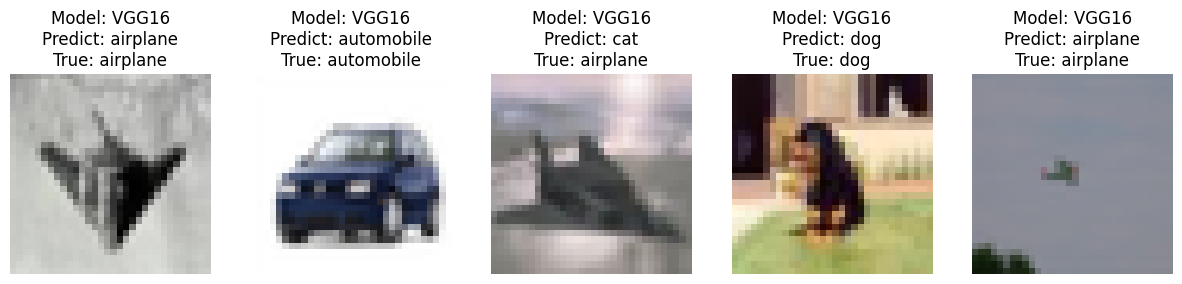

In [18]:
display_pred(vgg16_model, "VGG16")